In [1]:
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer as S
from nltk.tokenize import word_tokenize
nltk.download('punkt')
import re
from nltk.corpus import wordnet as wn
nltk.download('wordnet')



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/havishrani/nltk_data...
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/havishrani/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/havishrani/nltk_data...


True

In [2]:
! pip install praw
import praw

CSS = """
.output {
    flex-direction: row;
}
"""

HTML('<style>{}</style>'.format(CSS))

In [5]:
user_agent = "Scraper 1.0 by /u/Alternative_Elk2555"
reddit = praw.Reddit(
    client_id = "ggBGWPlZTGbJWFmr0nyiRw",
    client_secret = "vk_rAmVVOihqxWJDo1AnfyHbEEIXvA",
    user_agent = user_agent,
    check_for_async=False
)

In [6]:
headlines_uiuc = []
comments_uiuc = []
for submission in reddit.subreddit('UIUC').hot(limit = 500):
  print(submission.title, "title")
  comments = []
  for comment in submission.comments:
    # print(comment.body, "body")
    comments.append(comment.body)
  headlines_uiuc.append(submission.title)
  # print(headlines_uiuc, "headline")
  comments_uiuc.append(comments)
  # print(comments_uiuc, "comment")
# print(comments_uiuc, "comments_uiuc")

headlines_chicago = []
comments_chicago = []
for submission in reddit.subreddit('chicago').hot(limit = 500):
  print(submission.title, ",title")
  comments = []
  for comment in submission.comments:
    if hasattr(comment, 'body'):
      comments.append(comment.body)
    else:
      continue
  headlines_chicago.append(submission.title)
  comments_chicago.append(comments)
# print(len(headlines_chicago))

Reminder - the spam filter is a little too aggressive and flags a lot of posts that it shouldn't title
New 'Sublease' Post Flair, now required for all sublease posts title
Ain't no way dude 😭😭😭 title
why are they ruining the libraries? title
Champaign's Amtrak corridor (Chicago - Carbondale) is getting funding to study service improvements title
Can I still get in UIUC Undecided if I am rejected from the CS program? title
Anyone else freaking the hell out about the MATH241/Calc 3 final? (with Heller) title
Survey about Generative AI in the Classroom title
Raising the skates: U of I Ice Arena faces uncertain future title
Moving out sale, everything needs to go 12/16/23. At least 50% discount on original price. title
Lost Keys title
Res. Hall Reading Day! title
GEO is wilding title
CALL TO ACTION - UI ICE ARENA title
Extra Tickets for Graduation title
Moving out sale, everything needs to go 12/16/23. At least 50% discount on original price. title
Spring 2024 Sublease title
Online Master 

In [7]:
print(len(headlines_uiuc))
print(len(comments_uiuc))
print(len(headlines_chicago))
print(len(comments_chicago))
df = pd.DataFrame({'headline':headlines_uiuc, 'comments':comments_uiuc})
df['most_association'] = 0

for index, row in df.iterrows():
  title = row[0]
  print(title)
  # remove stopwords
  title = re.sub("[\[].*?[\]]", "", title)
  title =re.sub(r"[^a-zA-Z.]+", ' ', title)
  tokenize_list = word_tokenize(title)
  print(tokenize_list)
  if len(tokenize_list) == 0:
    continue

  total_association = 0
  for word in tokenize_list:
    word1 = word
    word2 = "food"
    if len(wn.synsets(word1)) == 0:
      continue
    syn1 = wn.synsets(word1)[0]
    syn2 = wn.synsets(word2)[0]
    value = syn1.wup_similarity(syn2)
    if value > total_association:
      total_association = value

  df.at[index, 'most_association'] = total_association
df = df.sort_values(by=['most_association'], ascending=False)
df = df.head(50)



# Starting filtering of chicago reddit posts
df2 = pd.DataFrame({'headline':headlines_chicago, 'comments':comments_chicago})
df2['most_association'] = 0

for index, row in df2.iterrows():
  title = row[0]
  print(title)
  # remove stopwords
  title = re.sub("[\[].*?[\]]", "", title)
  title =re.sub(r"[^a-zA-Z.]+", ' ', title)
  tokenize_list = word_tokenize(title)
  print(tokenize_list)
  if len(tokenize_list) == 0:
    continue

  total_association = 0
  for word in tokenize_list:
    word1 = word
    word2 = "food"
    if len(wn.synsets(word1)) == 0:
      continue
    syn1 = wn.synsets(word1)[0]
    syn2 = wn.synsets(word2)[0]
    value = syn1.wup_similarity(syn2)
    if value > total_association:
      total_association = value

  df2.at[index, 'most_association'] = total_association
df2 = df2.sort_values(by=['most_association'], ascending=False)
df2 = df2.head(50)

# displaying both dfs
display(df)
display(df2)

500
500
500
500
Reminder - the spam filter is a little too aggressive and flags a lot of posts that it shouldn't
['Reminder', 'the', 'spam', 'filter', 'is', 'a', 'little', 'too', 'aggressive', 'and', 'flags', 'a', 'lot', 'of', 'posts', 'that', 'it', 'shouldn', 't']


/var/folders/wl/vsxphq956nqf27h3wx_mmbfm0000gn/T/ipykernel_74018/3189603131.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  title = row[0]
/var/folders/wl/vsxphq956nqf27h3wx_mmbfm0000gn/T/ipykernel_74018/3189603131.py:31: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.7142857142857143' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.at[index, 'most_association'] = total_association


New 'Sublease' Post Flair, now required for all sublease posts
['New', 'Sublease', 'Post', 'Flair', 'now', 'required', 'for', 'all', 'sublease', 'posts']
Ain't no way dude 😭😭😭
['Ain', 't', 'no', 'way', 'dude']
why are they ruining the libraries?
['why', 'are', 'they', 'ruining', 'the', 'libraries']
Champaign's Amtrak corridor (Chicago - Carbondale) is getting funding to study service improvements
['Champaign', 's', 'Amtrak', 'corridor', 'Chicago', 'Carbondale', 'is', 'getting', 'funding', 'to', 'study', 'service', 'improvements']
Can I still get in UIUC Undecided if I am rejected from the CS program?
['Can', 'I', 'still', 'get', 'in', 'UIUC', 'Undecided', 'if', 'I', 'am', 'rejected', 'from', 'the', 'CS', 'program']
Anyone else freaking the hell out about the MATH241/Calc 3 final? (with Heller)
['Anyone', 'else', 'freaking', 'the', 'hell', 'out', 'about', 'the', 'MATH', 'Calc', 'final', 'with', 'Heller']
Survey about Generative AI in the Classroom
['Survey', 'about', 'Generative', 'AI',

/var/folders/wl/vsxphq956nqf27h3wx_mmbfm0000gn/T/ipykernel_74018/3189603131.py:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  title = row[0]
/var/folders/wl/vsxphq956nqf27h3wx_mmbfm0000gn/T/ipykernel_74018/3189603131.py:64: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.3076923076923077' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df2.at[index, 'most_association'] = total_association


❤️
[]
Candidates spar as deadline arrives to get on the 2024 primary ballot
['Candidates', 'spar', 'as', 'deadline', 'arrives', 'to', 'get', 'on', 'the', 'primary', 'ballot']
Move to Limit Access to City Council Meetings ‘Likely Illegal,’ Better Government Association Warns Mayor
['Move', 'to', 'Limit', 'Access', 'to', 'City', 'Council', 'Meetings', 'Likely', 'Illegal', 'Better', 'Government', 'Association', 'Warns', 'Mayor']
Progressives Were 'Not Ready' For Mayor's Office, Ald. Jeanette Taylor Says: 'We Look Real Stupid Right Now'
['Progressives', 'Were', 'Not', 'Ready', 'For', 'Mayor', 's', 'Office', 'Ald', '.', 'Jeanette', 'Taylor', 'Says', 'We', 'Look', 'Real', 'Stupid', 'Right', 'Now']
Governor pauses construction at Brighton Park migrant site following environmental report
['Governor', 'pauses', 'construction', 'at', 'Brighton', 'Park', 'migrant', 'site', 'following', 'environmental', 'report']
How is the Yellow Line still down since Nov 16th?
['How', 'is', 'the', 'Yellow', 'Lin

,headline,comments,most_association
314,Im just being curious but what is everyones fa...,"[Fernando's, I think Fernando's probably gets ...",1.000000
154,anybody have fresh food they don’t want? lowke...,[There's a few food pantries around here that ...,1.000000
165,what happened to UIUC free food twitter?,"[Bro missed the lawsuit, The owner of the acco...",1.000000
264,Booze shop on campus with decent hard cider se...,[Not on campus… but Binny’s probably has the b...,0.833333
473,9 meals and 38.25 dining dollars?,[The prorated it since the dining halls were c...,0.833333
384,There's a new spot for coffee on campus,[],0.833333
166,Need a quiet space to study for finals this we...,[Or you could go to the CBTF for a Day of Dist...,0.833333
215,Anyone want butter?,[Learn to make croissants. (Unronically thoug...,0.769231
274,Sushi advise,[Sakanaya is my favorite sushi place on campus...,0.769231
268,Mulled wine around campus,"[Riggs, You can buy glugwein at Aldi usually]",0.769231


,headline,comments,most_association
263,Unique International Food spots,"[Hi! You appear to be asking a question, pleas...",1.000000
165,(Serious Only) Wanting to make multilingual si...,"[Hi! You appear to be asking a question, pleas...",1.000000
353,Chicago Food Retailers Foxtrot and Dom’s Kitch...,"[Dominick’s, Mariano’s, Doms…I look forward to...",1.000000
433,Tesfa: new location and same great food,"[Wow, thanks for the update! We love that plac...",1.000000
190,"State, food bank step in to keep migrants fed ...",[Pritzker is stepping in to fix yet another of...,1.000000
350,[JB Pritzker] Malort is one of Chicago’s fines...,"[""One of"" working harder in this phrase than I...",0.909091
44,Feed birds (but not sparrows)?,"[Hi! You appear to be asking a question, pleas...",0.909091
206,Recommended healthy prepared meals services in...,"[Hi! You appear to be asking a question, pleas...",0.833333
82,"Eggs With Benefits Brings Sandwiches, Korean-I...",[Headed there this weekend. Looking forward to...,0.833333
218,Any pizza shops that sell dough?,"[Hi! You appear to be asking a question, pleas...",0.769231


In [8]:
# starting sentiment analysis
s_uiuc = S()
results_uiuc = []

s_chicago = S()
results_chicago = []

for index, row in df.iterrows():
  line = row[0]
  polarity = s_uiuc.polarity_scores(line)
  polarity['headline'] = line
  polarity['comments'] = row[1]
  results_uiuc.append(polarity)

for index, row in df2.iterrows():
  line = row[0]
  polarity = s_chicago.polarity_scores(line)
  polarity['headline'] = line
  polarity['comments'] = row[1]
  results_chicago.append(polarity)

pprint(results_uiuc[:3], width = 100)
print("\n")
print("\n")
pprint(results_chicago[:3], width = 100)


[{'comments': ["Fernando's",
               "I think Fernando's probably gets my top spot, but there are a lot of good ones.\n"
               '\n'
               "Smith Burger is incredible, Watson's is great. La Paloma is great. Jurassic Grill "
               'used to be great but seemed to decline in quality a bit.',
               'Fernandos all day. The people are super nice and the food is phenomenal',
               'Smithburger',
               'Watsons and Fernando’s',
               "Mo's Burritos on Prospect and Bradley",
               'Watsons is up there with the best chicken I’ve ever had',
               'Mos',
               'Pasta Mania, usually at the pawn shop on University near Lincoln. So good.',
               "Juanito's tacos is rlly good!",
               'The black food truck on Bloomington Rd in Champaign, best tacos in town by far',
               "Juanito's tacos",
               'The Watson’s truck is lowkey better than the restaurant…',
               'F

/var/folders/wl/vsxphq956nqf27h3wx_mmbfm0000gn/T/ipykernel_74018/4072037454.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  line = row[0]
/var/folders/wl/vsxphq956nqf27h3wx_mmbfm0000gn/T/ipykernel_74018/4072037454.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  polarity['comments'] = row[1]
/var/folders/wl/vsxphq956nqf27h3wx_mmbfm0000gn/T/ipykernel_74018/4072037454.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  line =

In [9]:
df = pd.DataFrame.from_records(results_uiuc)
df.head()

df2 = pd.DataFrame.from_records(results_chicago)
df2.head()

display(df)
display(df2)

,neg,neu,pos,compound,headline,comments
0,0.000,0.639,0.361,0.6858,Im just being curious but what is everyones fa...,"[Fernando's, I think Fernando's probably gets ..."
1,0.000,0.783,0.217,0.3818,anybody have fresh food they don’t want? lowke...,[There's a few food pantries around here that ...
2,0.000,0.645,0.355,0.5106,what happened to UIUC free food twitter?,"[Bro missed the lawsuit, The owner of the acco..."
3,0.149,0.851,0.000,-0.1027,Booze shop on campus with decent hard cider se...,[Not on campus… but Binny’s probably has the b...
4,0.000,1.000,0.000,0.0000,9 meals and 38.25 dining dollars?,[The prorated it since the dining halls were c...
5,0.000,1.000,0.000,0.0000,There's a new spot for coffee on campus,[]
6,0.000,0.786,0.214,0.8398,Need a quiet space to study for finals this we...,[Or you could go to the CBTF for a Day of Dist...
7,0.000,0.606,0.394,0.0772,Anyone want butter?,[Learn to make croissants. (Unronically thoug...
8,0.000,1.000,0.000,0.0000,Sushi advise,[Sakanaya is my favorite sushi place on campus...
9,0.000,1.000,0.000,0.0000,Mulled wine around campus,"[Riggs, You can buy glugwein at Aldi usually]"


,neg,neu,pos,compound,headline,comments
0,0.000,1.000,0.000,0.0000,Unique International Food spots,"[Hi! You appear to be asking a question, pleas..."
1,0.000,1.000,0.000,0.0000,(Serious Only) Wanting to make multilingual si...,"[Hi! You appear to be asking a question, pleas..."
2,0.000,1.000,0.000,0.0000,Chicago Food Retailers Foxtrot and Dom’s Kitch...,"[Dominick’s, Mariano’s, Doms…I look forward to..."
3,0.000,0.594,0.406,0.6249,Tesfa: new location and same great food,"[Wow, thanks for the update! We love that plac..."
4,0.141,0.859,0.000,-0.3182,"State, food bank step in to keep migrants fed ...",[Pritzker is stepping in to fix yet another of...
5,0.000,1.000,0.000,0.0000,[JB Pritzker] Malort is one of Chicago’s fines...,"[""One of"" working harder in this phrase than I..."
6,0.000,1.000,0.000,0.0000,Feed birds (but not sparrows)?,"[Hi! You appear to be asking a question, pleas..."
7,0.000,0.385,0.615,0.6597,Recommended healthy prepared meals services in...,"[Hi! You appear to be asking a question, pleas..."
8,0.000,0.794,0.206,0.3818,"Eggs With Benefits Brings Sandwiches, Korean-I...",[Headed there this weekend. Looking forward to...
9,0.000,1.000,0.000,0.0000,Any pizza shops that sell dough?,"[Hi! You appear to be asking a question, pleas..."


In [13]:
df['label'] = 'neutral'
df.loc[df['compound'] > 0.2, 'label'] = 'positive'
df.loc[df['compound'] < -0.2, 'label'] = 'negative'
df.head()

df_main = df[['headline', 'comments', 'label', 'compound']]
df_main


df2['label'] = 'neutral'
df2.loc[df2['compound'] > 0.2, 'label'] = 'positive'
df2.loc[df2['compound'] < -0.2, 'label'] = 'negative'
df2.head()

df2_main = df2[['headline', 'comments', 'label', 'compound']]
df2_main

display(df_main)
display(df2_main)



,headline,comments,label,compound
0,Im just being curious but what is everyones fa...,"[Fernando's, I think Fernando's probably gets ...",positive,0.6858
1,anybody have fresh food they don’t want? lowke...,[There's a few food pantries around here that ...,positive,0.3818
2,what happened to UIUC free food twitter?,"[Bro missed the lawsuit, The owner of the acco...",positive,0.5106
3,Booze shop on campus with decent hard cider se...,[Not on campus… but Binny’s probably has the b...,neutral,-0.1027
4,9 meals and 38.25 dining dollars?,[The prorated it since the dining halls were c...,neutral,0.0000
5,There's a new spot for coffee on campus,[],neutral,0.0000
6,Need a quiet space to study for finals this we...,[Or you could go to the CBTF for a Day of Dist...,positive,0.8398
7,Anyone want butter?,[Learn to make croissants. (Unronically thoug...,neutral,0.0772
8,Sushi advise,[Sakanaya is my favorite sushi place on campus...,neutral,0.0000
9,Mulled wine around campus,"[Riggs, You can buy glugwein at Aldi usually]",neutral,0.0000


,headline,comments,label,compound
0,Unique International Food spots,"[Hi! You appear to be asking a question, pleas...",neutral,0.0000
1,(Serious Only) Wanting to make multilingual si...,"[Hi! You appear to be asking a question, pleas...",neutral,0.0000
2,Chicago Food Retailers Foxtrot and Dom’s Kitch...,"[Dominick’s, Mariano’s, Doms…I look forward to...",neutral,0.0000
3,Tesfa: new location and same great food,"[Wow, thanks for the update! We love that plac...",positive,0.6249
4,"State, food bank step in to keep migrants fed ...",[Pritzker is stepping in to fix yet another of...,negative,-0.3182
5,[JB Pritzker] Malort is one of Chicago’s fines...,"[""One of"" working harder in this phrase than I...",neutral,0.0000
6,Feed birds (but not sparrows)?,"[Hi! You appear to be asking a question, pleas...",neutral,0.0000
7,Recommended healthy prepared meals services in...,"[Hi! You appear to be asking a question, pleas...",positive,0.6597
8,"Eggs With Benefits Brings Sandwiches, Korean-I...",[Headed there this weekend. Looking forward to...,positive,0.3818
9,Any pizza shops that sell dough?,"[Hi! You appear to be asking a question, pleas...",neutral,0.0000


In [14]:
# comments associated with positive sentiments about food

uiuc_comments = []
for index, row in df.iterrows():
  comments = row[5]
  # print(comments)
  if len(comments) == 0:
    continue
  for comment in comments:
    full_comment = comment
    # print(comment)
    # remove stopwords
    comment = re.sub("[\[].*?[\]]", "", comment)
    comment =re.sub(r"[^a-zA-Z.]+", ' ', comment)
    tokenize_list = word_tokenize(comment)
    # print(tokenize_list)
    if len(tokenize_list) == 0:
      continue
    for word in tokenize_list:
      word1 = word
      word2 = "food"
      if len(wn.synsets(word1)) == 0:
        continue
      syn1 = wn.synsets(word1)[0]
      syn2 = wn.synsets(word2)[0]
      value = syn1.wup_similarity(syn2)
      if 0.8 < value and row[3] > 0.2:
        uiuc_comments.append(full_comment)
        break
print(uiuc_comments, "final comments")


chicago_comments = []
for index, row in df2.iterrows():
  comments = row[5]
  #print(comments)
  if len(comments) == 0:
    continue
  for comment in comments:
    full_comment = comment
    #print(comment)
    # remove stopwords
    comment = re.sub("[\[].*?[\]]", "", comment)
    comment =re.sub(r"[^a-zA-Z.]+", ' ', comment)
    tokenize_list = word_tokenize(comment)
    #print(tokenize_list)
    if len(tokenize_list) == 0:
      continue
    for word in tokenize_list:
      word1 = word
      word2 = "food"
      if len(wn.synsets(word1)) == 0:
        continue
      syn1 = wn.synsets(word1)[0]
      syn2 = wn.synsets(word2)[0]
      value = syn1.wup_similarity(syn2)
      if 0.8 < value and row[3] > 0.2:
        chicago_comments.append(full_comment)
        break
print(chicago_comments, "final comments")



/var/folders/wl/vsxphq956nqf27h3wx_mmbfm0000gn/T/ipykernel_74018/2690712442.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  comments = row[5]
/var/folders/wl/vsxphq956nqf27h3wx_mmbfm0000gn/T/ipykernel_74018/2690712442.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if 0.8 < value and row[3] > 0.2:


['Fernandos all day. The people are super nice and the food is phenomenal', 'The black food truck on Bloomington Rd in Champaign, best tacos in town by far', 'lapaloma food truck. By far the best Torta I have had in my life.d', 'Pandamonium doughnuts, real food is for losers lol', "I remember going to this food truck at like 2am or something, and i got this massive burritio that was like if you stacked 4 burritos next to each other into one burrito. I have no idea what food truck that was, but if anyone knows what I'm talking about can you let me know? I want that burrito again!", 'La Paloma Food Truck', 'The OG cracked food truck was amazing (way better than the brick and mortar restaurant now on green). Would get that and eat Dave’s dogs while waiting for the cracked to be made lol. Also enjoyed burrito king but they didn’t have a food truck when I lived on campus. Graduated 2017', 'The food truck in front of Loomis with super burrito. Which is the size of three burrito end to end.',

/var/folders/wl/vsxphq956nqf27h3wx_mmbfm0000gn/T/ipykernel_74018/2690712442.py:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  comments = row[5]
/var/folders/wl/vsxphq956nqf27h3wx_mmbfm0000gn/T/ipykernel_74018/2690712442.py:57: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if 0.8 < value and row[3] > 0.2:


['Hi! You appear to be asking a question, please do check our [wiki](https://www.reddit.com/r/chicago/wiki/index) for tips on the [rules](https://www.reddit.com/r/Chicago/about/rules), other [Chicago-related subreddits](https://www.reddit.com/r/chicago/wiki/subreddits), where to [eat/drink](https://www.reddit.com/r/chicago/wiki/eats), how to [get around](https://www.reddit.com/r/chicago/wiki/transportation)/[navigate the CTA](https://www.reddit.com/r/chicago/wiki/transit), where to [visit](https://www.reddit.com/r/chicago/wiki/visitingchicago), what [neighborhoods](https://www.reddit.com/r/chicago/wiki/neighborhoods) to move to, tips on [living here](https://www.reddit.com/r/chicago/wiki/dwelling), and more. Also be sure to use the [search](https://www.reddit.com/r/chicago/search?restrict_sr=on&include_over_18=on&sort=relevance&t=all) feature to find responses to other users asking similar questions.\n\n*I am a bot, and this action was performed automatically. Please [contact the moder

In [15]:
display(df.label.value_counts(normalize = True) * 100)
print("\n")
display(df2.label.value_counts(normalize = True) * 100)

label
neutral     56.0
positive    28.0
negative    16.0
Name: proportion, dtype: float64

label
neutral     58.0
positive    34.0
negative     8.0
Name: proportion, dtype: float64

In [16]:
display(df.groupby('label')['compound'].describe())
display(df2.groupby('label')['compound'].describe())

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
negative,8.0,-0.468062,0.163981,-0.7430,-0.57165,-0.41375,-0.34790,-0.2960
neutral,28.0,0.005539,0.030001,-0.1027,0.00000,0.00000,0.00000,0.0772
positive,14.0,0.652721,0.215300,0.3612,0.47070,0.61640,0.82675,0.9633


,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
negative,4.0,-0.381700,0.070475,-0.4767,-0.4131,-0.36595,-0.33455,-0.3182
neutral,29.0,-0.003541,0.019071,-0.1027,0.0000,0.00000,0.00000,0.0000
positive,17.0,0.513582,0.125162,0.3182,0.3818,0.51060,0.63690,0.6908


<Axes: title={'center': 'compound'}, xlabel='label'>

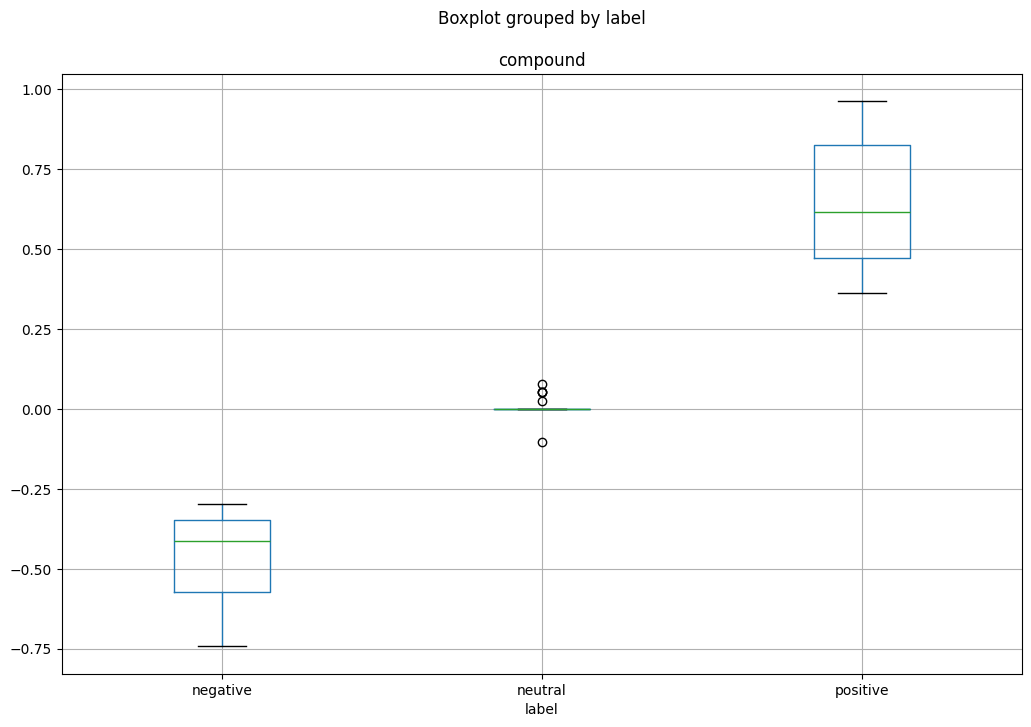

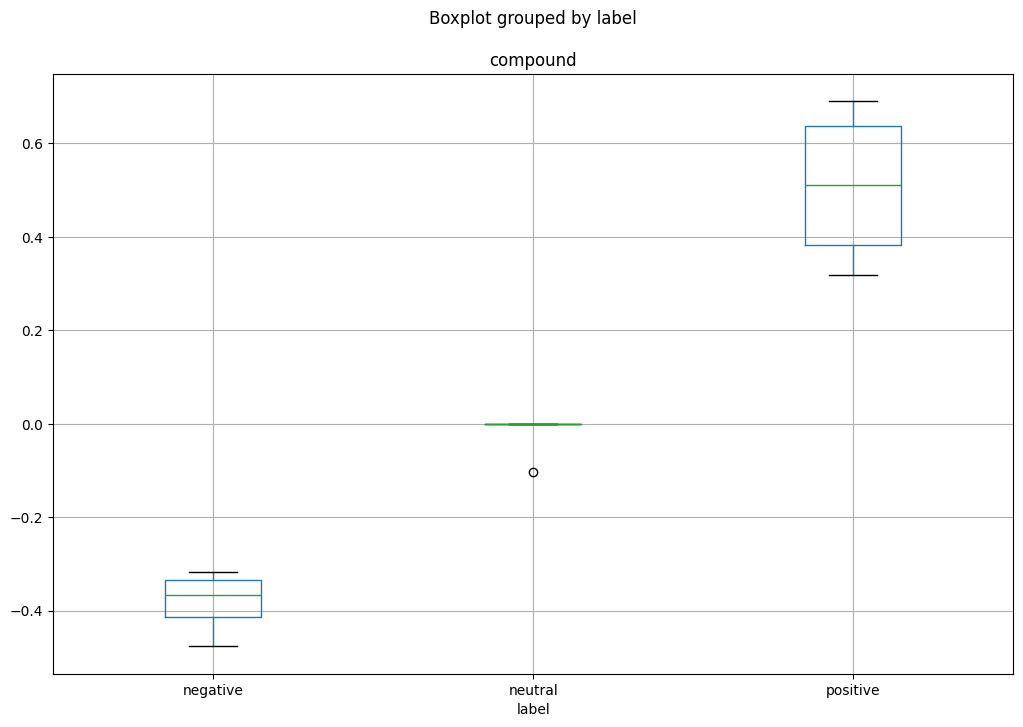

In [17]:
df.boxplot(by='label', column='compound', figsize=(12,8))
df2.boxplot(by='label', column='compound', figsize=(12,8))